# RANS-CVA

Stands for Reynolds Average Navier Stokes - Coherent Vortex Agent

## Objective
To recover the mixing induced by vortices in low Reynolds number flows

## Equations

### RANS Lagrangian particles

The transport of tracers and point-eddies is Lagrangian. In pure RANS, acceleration typically contains a Brownian term to model turbulent diffusion:
$$
\frac{d\mathbf{u}'_p}{dt}=W(t)\sqrt{\frac{2k(\mathbf{x}_p)}{3}}\mathbf{e}
$$
where $W(t)$ is a Brownian term, $\mathbf{e}$ the unit vector and $k$ the local turbulent kinetic energy of the flow. The drag force is not considered here, as the particles of interest are considered passive, or inertialess particles. Lagrangian tracking consists of the  integration of the above equation and the below equation: 

$$
\frac{d\mathbf{x}_p}{dt} = \overline{\mathbf{u}}(\mathbf{x}_p)+\mathbf{u}'_p(\mathbf{x}_p,t)
$$
The first velocity on the RHS is the RANS mean velocity vector.

### RANS-Coherent Vortex agents

We propose to control the dispersion of tracers using point-eddies (in 2D) or agents

$$
\frac{d\mathbf{x}_p}{dt} = \overline{\mathbf{u}}(\mathbf{x}_p)+\widetilde{\mathbf{u}}(\mathbf{x}_p,t)
$$

The new term on the RHS is the induced velocity vector generated by the presence of a number $\N_{e}$ of point-eddies of circulation $\Gamma_j$ and radius $\sigma_j$:
$$
\widetilde{\mathbf{u}}(\mathbf{x},t)=\sum_{j=1}^{N_e}\Gamma_j\mathbf{K}_\sigma(\mathbf{x}-\mathbf{x}_j)
$$
with the eddy kernel:
$$
\mathbf{K}_\sigma(r)=\frac{1}{2\pi r^2}\left(1-\exp\left(-\frac{r^2}{\sigma^2}\right)\right)\left[-r_y,r_x\right]
$$

The variables are:
* Injection location and timing of point-eddies
* Circulation and radius of individual point-eddies and their possible evolution in time.

### Code
The code below uses a mean velocity flow field computed with YALES2 on an instructured mesh. Interpolation of the tracers' velocity vectors on the mean flow field is based on https://en.wikipedia.org/wiki/Inverse_distance_weighting

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.tri as tri

unstrmesh = h5py.File('flowdata/2D_cyl.sol000000_1.mesh.h5','r')
coords = unstrmesh['Coordinates']
xcfd = np.array(coords['XYZ'][:,0])
ycfd = np.array(coords['XYZ'][:,1])
# Nr = 21
# r = 0.5
# xr = np.linspace(-r,r,Nr)
# xadded = np.array([])
# yadded = np.array([])
# for i in range(Nr):
#     for j in range(Nr):
#         if (np.sqrt(xr[i]**2 + xr[j]**2) < r):
#             xadded = np.append(xadded,xr[i])
#             yadded = np.append(yadded,xr[j])
# phiadded = np.zeros_like(xadded)
# xcfd = np.append(xcfd,xadded)
# ycfd = np.append(ycfd,yadded)

Ncfdpts = len(xcfd)
cfdpts = np.zeros((Ncfdpts,2),dtype='float64')
cfdpts[:,0] = xcfd
cfdpts[:,1] = ycfd
fields = h5py.File('flowdata/2D_cyl.sol000400_1.sol.h5', 'r')
data = fields['Data']
u_mean = np.array(data['U_MEAN'][:,0])
# u_mean = np.append(u_mean,phiadded)
v_mean = np.array(data['U_MEAN'][:,1])
# v_mean = np.append(v_mean,phiadded)
u_rms = np.array(data['U_RMS'][:,0])
# u_rms = np.append(u_rms,phiadded)
v_rms = np.array(data['U_RMS'][:,1])
# v_rms = np.append(v_rms,phiadded)
xreg = np.linspace(-10,50,600)
yreg = np.linspace(-15,15,300)
Xreg,Yreg = np.meshgrid(xreg,yreg)
# Um = griddata((x,y),u_mean,(Xreg,Yreg),method='cubic')
# plt.figure()
# plt.scatter(x,y,s = 0.1,c=u_mean)
# plt.show()
# plt.figure()
# plt.contourf(Xreg,Yreg,Um)
# plt.show()
# triang = tri.Triangulation(xcfd, ycfd)
# uminterpolator = tri.CubicTriInterpolator(triang, u_mean)
# Um = uminterpolator(Xreg,Yreg)
# vminterpolator = tri.CubicTriInterpolator(triang, v_mean)
# Vm = vminterpolator(Xreg,Yreg)
# urinterpolator = tri.CubicTriInterpolator(triang, u_rms)
# Ur = urinterpolator(Xreg,Yreg)
# vrinterpolator = tri.CubicTriInterpolator(triang, v_rms)
# Vr = vrinterpolator(Xreg,Yreg)
# fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)
# axs[0,0].contourf(Xreg,Yreg,Um)
# axs[1,0].contourf(Xreg,Yreg,Vm)
# axs[0,1].contourf(Xreg,Yreg,Ur)
# axs[1,1].contourf(Xreg,Yreg,Vr)
# plt.show()


In [45]:
particles = h5py.File("flowdata/2D_cyl.sol000400.ptset1_1.sol.h5",'r')
ptset = particles['Coordinates']['XYZ']
# ptset[0,:]
ptsetval = particles['Data']['INJECTOR']
ptsetval[:]

array([2., 1., 2., ..., 2., 2., 2.])

In [130]:
from scipy.interpolate import griddata
from scipy.interpolate import RectBivariateSpline
xmin = -10.; xmax = 50.
ymin = -15.; ymax = 15.
xbnds = np.linspace(xmin,xmax,61)
ybnds = np.linspace(ymin,ymax,31)
xcn = (xbnds[1:] + xbnds[:-1])/2.
ycn = (ybnds[1:] + ybnds[:-1])/2.
dx = xbnds[1] - xbnds[0]
dy = ybnds[1] - ybnds[0]
print(dx,dy)
class PtsList(object):
    def __init__(self,i,j):
        global u_mean,v_mean,u_rms,v_rms,xbnds,ybnds,xcn,ycn,xcfd,ycfd
        self.i = i
        self.j = j
        self.xmin = xbnds[i]
        self.xmax = xbnds[i+1]
        self.ymin = ybnds[j]
        self.ymax = ybnds[j+1]
        self.xcenter = xcn[i]
        self.ycenter = ycn[j]
        listpts = []
        xlist = []
        ylist = []
        ulist = []
        vlist = []
        klist = []
        Npts = 0
        for k in range(len(xcfd)):
            if (xcfd[k] >= self.xmin) and (xcfd[k] < self.xmax):
                if (ycfd[k] >= self.ymin) and (ycfd[k] < self.ymax):
                    listpts.append(k)
                    xlist.append(xcfd[k])
                    ylist.append(xcfd[k])
                    ulist.append(u_mean[k])
                    vlist.append(v_mean[k])
                    klist.append((u_rms[k]**2 + v_rms[k]**2)/2.)
                    Npts += 1
        if Npts == 0:
            self.xlist = [xcn[j]]
            self.ylist = [ycn[j]]
            self.ulist = [1.0]
            self.vlist = [1.0]
            self.klist = [0.0]
            self.listpts = [-1]
            Npts = 1
        else:
            self.xlist = xlist
            self.ylist = ylist
            self.ulist = ulist
            self.vlist = vlist
            self.klist = klist
            self.listpts = listpts
        
        self.Npts = Npts
Nxgrid = len(xcn)
Nygrid = len(ycn)
lpts = []
il = 0
ijlpts = np.zeros((Nxgrid,Nygrid),dtype='int')
for i in range(Nxgrid):
    for j in range(Nygrid):
        lpts.append(PtsList(i,j))
#         print(lpts[il].Npts)
        ijlpts[i,j] = il
        il += 1


1.0 1.0


In [68]:
for il in range(len(lpts)):
    if lpts[il].Npts == 0:
        print(il,lpts[il].xmin,lpts[il].ymin)

In [105]:
def IDW(ptsint,pts,phi):
    n = 2
    R = 0.5
    if np.isscalar(phi):
        phiint = phi
    else:
        d = np.sqrt((ptsint[0] - pts[:,0])**2 + (ptsint[1] - pts[:,1])**2)    
        mask = np.where(d < 1e-6)
        if len(mask[0]) > 0:
            phiint = phi[mask]
        else:
            den = np.sum(1./d**n)
            num = np.sum(phi/d**2)
            phiint = num/den
#             if np.amin(d) < R :
#                 mask = np.where( d < R)
                
#                 print(mask,len(mask))
#                 den = np.sum(1./d[mask]**n)
#                 num = np.sum(phi[mask]/d[mask]**n)
#                 phi = num/den
#             else:
#                 il = np.argmin(d)
#                 phiint = phi[il]
    return phiint

In [70]:
def NN(ptsint,pts,phi):
    n = 2
    R = 0.2
    if np.isscalar(phi):
        phiint = phi
    else:
        d = np.sqrt((ptsint[0] - pts[:,0])**2 + (ptsint[1] - pts[:,1])**2)   
        il = np.argmin(d)
        phiint = phi[il]
    return phiint

In [132]:
np.random.normal(0.0,0.1,2)

array([0.11163453, 0.18927413])

## RANS


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
dims = 2
trdims = 5
eddims = 9
i_x = 0; i_y = 1; i_u = 2; i_v = 3; i_G = 4; i_s = 5; i_t = 6; i_count = 7; i_D = 8; i_inj=4


dt = 0.1
xmin = -10.
xmax = 50.
ymin = -15.
ymax = 15.
ymin_inj1 = -1.0
ymax_inj1 = -0.1
ymin_inj2 = 0.1
ymax_inj2 = 1.0
Npt_inj = 5
y_inj1 = np.linspace(ymin_inj1,ymax_inj1,Npt_inj)
y_inj2 = np.linspace(ymin_inj2,ymax_inj2,Npt_inj)
x_inj = xmin*np.ones(Npt_inj)
tracers_inj1 = np.zeros((Npt_inj,trdims),dtype='float64')
tracers_inj1[:,i_y] = y_inj1
tracers_inj1[:,i_x] = xmin
tracers_inj1[:,i_u] = 1.0
tracers_inj1[:,i_inj] = 1.0
tracers_inj2 = np.zeros((Npt_inj,trdims),dtype='float64')
tracers_inj2[:,i_y] = y_inj2
tracers_inj2[:,i_x] = xmin
tracers_inj2[:,i_u] = 1.0
tracers_inj2[:,i_inj] = 0.0
T_tracer_inj = 0.2
it_inj = int(T_tracer_inj / dt)
T_eddies = 3.
it_eddy_inj = int(T_eddies / dt)
x_eddy_inj = 1.0
y_eddy_inj = 0.25
Drag = 1.0
Gamma_max = 1.0
c_growth = 2.0
t_G_max = 4.0
c_decay = 0.001
sigma_inj = 0.05
def Gfunc(t):
    global c_growth,c_decay,Gamma_max
    if t <= t_G_max:
        G = Gamma_max*t/t_G_max
    else:
        G = np.max([Gamma_max*(1-c_decay*(t-t_G_max)),0.])
    return G
eddy_inj = np.zeros((1,eddims),dtype='float64')
eddy_inj[0,i_x] = x_eddy_inj
eddy_inj[0,i_y] = y_eddy_inj
eddy_inj[0,i_u] = 0.0
eddy_inj[0,i_v] = 0.0
eddy_inj[0,i_G] = 0.0
eddy_inj[0,i_s] = sigma_inj
eddy_inj[0,i_t] = 0.0
Tsimu = 100.
Nt = int(Tsimu / dt)

i = 0
iphase = 0
ie_count = 0
while i < Nt:
    if (i == 0):
        tracers = np.copy(tracers_inj1)
        tracers = np.insert(tracers,np.shape(tracers)[0],tracers_inj2,axis=0)
    elif (i % it_inj) == 0:
        tracers = np.insert(tracers,np.shape(tracers)[0],tracers_inj1,axis=0)
        tracers = np.insert(tracers,np.shape(tracers)[0],tracers_inj2,axis=0)
    Ntracers = np.shape(tracers)[0]
    if (i == 0):
        ie = 0
        eddies = np.copy(eddy_inj)
        eddies[ie,i_y] *= (-1.0)**ie_count
        eddies[ie,i_count] = ie_count
        Neddies = 1
        ie_count += 1
    elif (i % it_eddy_inj) == 0:
        eddies = np.insert(eddies,np.shape(eddies)[0],eddy_inj,axis=0)
        Neddies = np.shape(eddies)[0]
        ie = Neddies - 1
        eddies[ie,i_y] *= (-1.0)**ie_count
        eddies[ie,i_count] = ie_count
        ie_count += 1
    Ntracers = np.shape(tracers)[0]
#     print(Ntracers)
    # RANS velocity
#     for j in range(Ntracers):
    pts = np.copy(tracers[:,:i_y+1])
    itracers = (tracers[:,i_x] - xmin)/dx
    itracers = itracers.astype(int)
#     print(itracers)
    jtracers = (tracers[:,i_y] - ymin)/dy
    jtracers = jtracers.astype(int)
    for it in range(len(itracers)):
        il = ijlpts[itracers[it],jtracers[it]]
        Nlistpts = lpts[il].Npts
        itpts = np.zeros((Nlistpts,2))
        itpts[:,0] = lpts[il].xlist
        itpts[:,1] = lpts[il].ylist
        itu_mean = lpts[il].ulist
        itv_mean = lpts[il].vlist
        itk = lpts[il].klist
#         print(itu_mean,lpts[il].ulist,il)
        localk = IDW(tracers[it,:i_y+1],itpts,itk)
        uprime = np.random.normal(0,1.0,2)*np.sqrt(2*localk/dims)
        tracers[it,i_u] = IDW(tracers[it,:i_y+1],itpts,itu_mean) + uprime[i_x]
                          
        tracers[it,i_v] = IDW(tracers[it,:i_y+1],itpts,itv_mean) + uprime[i_y]
   
    tracers[:,i_x:i_y+1] += dt*tracers[:,i_u:i_v+1]
    # Boundary conditions
    maskx = np.where(tracers[:,i_x] > xmax)
    if (len(maskx[0]) > 0):
        tracers = np.delete(tracers,maskx[0],axis=0)
    masky = np.where(np.abs(tracers[:,i_y]) > ymax)
    if (len(masky[0]) > 0):
        tracers = np.delete(tracers,masky[0],axis=0)
    pts = np.copy(tracers[:,:i_y+1])
    maskr = np.where(tracers[:,i_x]**2+tracers[:,i_y]**2 <= 0.5)
    if (len(maskr[0]) > 0):
        tracers = np.delete(tracers,maskr[0],axis=0)
            
    i += 1
    
#     print(i)
    if (i % it_inj) == 0:
        print(Nt,i,Ntracers,Neddies)
        clear_output(wait=True)


1000 1000 2733 34


In [134]:
tracers_rans = np.copy(tracers)

# RANS-CVA

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
dims = 2
trdims = 5
eddims = 9
i_x = 0; i_y = 1; i_u = 2; i_v = 3; i_G = 4; i_s = 5; i_t = 6; i_count = 7; i_D = 8; i_inj=4


dt = 0.1
xmin = -10.
xmax = 50.
ymin = -15.
ymax = 15.
ymin_inj1 = -1.0
ymax_inj1 = -0.1
ymin_inj2 = 0.1
ymax_inj2 = 1.0
Npt_inj = 5
y_inj1 = np.linspace(ymin_inj1,ymax_inj1,Npt_inj)
y_inj2 = np.linspace(ymin_inj2,ymax_inj2,Npt_inj)
x_inj = xmin*np.ones(Npt_inj)
tracers_inj1 = np.zeros((Npt_inj,trdims),dtype='float64')
tracers_inj1[:,i_y] = y_inj1
tracers_inj1[:,i_x] = xmin
tracers_inj1[:,i_u] = 1.0
tracers_inj1[:,i_inj] = 1.0
tracers_inj2 = np.zeros((Npt_inj,trdims),dtype='float64')
tracers_inj2[:,i_y] = y_inj2
tracers_inj2[:,i_x] = xmin
tracers_inj2[:,i_u] = 1.0
tracers_inj2[:,i_inj] = 0.0
T_tracer_inj = 0.2
it_inj = int(T_tracer_inj / dt)
T_eddies = 3.
it_eddy_inj = int(T_eddies / dt)
x_eddy_inj = 1.0
y_eddy_inj = 0.25
Drag = 1.0
Gamma_max = 1.0
c_growth = 2.0
t_G_max = 4.0
c_decay = 0.001
sigma_inj = 0.05
def Gfunc(t):
    global c_growth,c_decay,Gamma_max
    if t <= t_G_max:
        G = Gamma_max*t/t_G_max
    else:
        G = np.max([Gamma_max*(1-c_decay*(t-t_G_max)),0.])
    return G
eddy_inj = np.zeros((1,eddims),dtype='float64')
eddy_inj[0,i_x] = x_eddy_inj
eddy_inj[0,i_y] = y_eddy_inj
eddy_inj[0,i_u] = 0.0
eddy_inj[0,i_v] = 0.0
eddy_inj[0,i_G] = 0.0
eddy_inj[0,i_s] = sigma_inj
eddy_inj[0,i_t] = 0.0
Tsimu = 100.
Nt = int(Tsimu / dt)

i = 0
iphase = 0
ie_count = 0
while i < Nt:
    if (i == 0):
        tracers = np.copy(tracers_inj1)
        tracers = np.insert(tracers,np.shape(tracers)[0],tracers_inj2,axis=0)
    elif (i % it_inj) == 0:
        tracers = np.insert(tracers,np.shape(tracers)[0],tracers_inj1,axis=0)
        tracers = np.insert(tracers,np.shape(tracers)[0],tracers_inj2,axis=0)
    Ntracers = np.shape(tracers)[0]
    if (i == 0):
        ie = 0
        eddies = np.copy(eddy_inj)
        eddies[ie,i_y] *= (-1.0)**ie_count
        eddies[ie,i_count] = ie_count
        Neddies = 1
        ie_count += 1
    elif (i % it_eddy_inj) == 0:
        eddies = np.insert(eddies,np.shape(eddies)[0],eddy_inj,axis=0)
        Neddies = np.shape(eddies)[0]
        ie = Neddies - 1
        eddies[ie,i_y] *= (-1.0)**ie_count
        eddies[ie,i_count] = ie_count
        ie_count += 1
    Ntracers = np.shape(tracers)[0]
#     print(Ntracers)
    # RANS velocity
#     for j in range(Ntracers):
    pts = np.copy(tracers[:,:i_y+1])
    itracers = (tracers[:,i_x] - xmin)/dx
    itracers = itracers.astype(int)
#     print(itracers)
    jtracers = (tracers[:,i_y] - ymin)/dy
    jtracers = jtracers.astype(int)
    for it in range(len(itracers)):
        il = ijlpts[itracers[it],jtracers[it]]
        Nlistpts = lpts[il].Npts
        itpts = np.zeros((Nlistpts,2))
        itpts[:,0] = lpts[il].xlist
        itpts[:,1] = lpts[il].ylist
        itu_mean = lpts[il].ulist
        itv_mean = lpts[il].vlist
#         print(itu_mean,lpts[il].ulist,il)
        tracers[it,i_u] = IDW(tracers[it,:i_y+1],itpts,itu_mean)
        tracers[it,i_v] = IDW(tracers[it,:i_y+1],itpts,itv_mean)
#     tracers[:,i_u] = np.ones_like(tracers[:,i_u]) #np.diag(f_Um(tracers[:,i_x],tracers[:,i_y]))
#     tracers[:,i_v] = np.zeros_like(tracers[:,i_u]) #np.diag(f_Vm(tracers[:,i_x],tracers[:,i_y]))
    # Eddy-Induced velocity
    for ie in range(Neddies):
        rvec = np.zeros((Ntracers,dims),dtype='float64')
        for j in range(dims):
            rvec[:,j] = tracers[:,j] - eddies[ie,j]
        r2 = rvec[:,i_x]**2+rvec[:,i_y]**2
        mask = np.where(r2 != 0.0)
        r2inv = np.zeros_like(r2)
        r2inv[mask] = 1.0/r2[mask]
        GKs = eddies[ie,i_G]/(2*np.pi)*r2inv*(1.0 - np.exp(-r2/(2*eddies[ie,i_s]**2)))
        tracers[:,i_u] -= GKs*rvec[:,i_y]
        tracers[:,i_v] += GKs*rvec[:,i_x]
    tracers[:,i_x:i_y+1] += dt*tracers[:,i_u:i_v+1]
    # Boundary conditions
    maskx = np.where(tracers[:,i_x] > xmax)
    if (len(maskx[0]) > 0):
        tracers = np.delete(tracers,maskx[0],axis=0)
    masky = np.where(np.abs(tracers[:,i_y]) > ymax)
    if (len(masky[0]) > 0):
        tracers = np.delete(tracers,masky[0],axis=0)
    pts = np.copy(tracers[:,:i_y+1])
    ieddies = (eddies[:,i_x] - xmin)/dx
    ieddies = ieddies.astype(int)
#     print(itracers)
    jeddies = (eddies[:,i_y] - ymin)/dy
    jeddies = jeddies.astype(int)
    for ie in range(Neddies):
        il = ijlpts[ieddies[ie],jeddies[ie]]
        Nlistpts = lpts[il].Npts
        itpts = np.zeros((Nlistpts,2))
        itpts[:,0] = lpts[il].xlist
        itpts[:,1] = lpts[il].ylist
        itu_mean = lpts[il].ulist
        itv_mean = lpts[il].vlist
#         print(itu_mean,lpts[il].ulist,il)
        eddies[ie,i_u] = IDW(eddies[ie,:i_y+1],itpts,itu_mean)
        eddies[ie,i_v] = IDW(eddies[ie,:i_y+1],itpts,itv_mean)
#     eddies[:,i_u] = 0.#bruteIDW(eddies[:,:i_y+1],u_mean)
#     eddies[:,i_v] = 0.#bruteIDW(eddies[:,:i_y+1],v_mean)
    for ie in range(Neddies):
        for ie1 in range(Neddies):
            if (ie != ie1):
                rvec = np.zeros(2,dtype='float64')
                rvec = eddies[ie,i_x:i_y+1] - eddies[ie1,i_x+i_y+1]
                r2 = np.sum(rvec**2)
                r2inv = 1.0/r2
                GKs = eddies[ie1,i_G]/(2*np.pi)*r2inv*(1.0 - np.exp(-r2/(2*eddies[ie1,i_s]**2)))
                eddies[ie,i_u] -= GKs*rvec[i_y]
                eddies[ie,i_v] += GKs*rvec[i_x]
    eddies[:,i_x:i_y+1] += dt*eddies[:,i_u:i_v+1]
    maskx = np.where(eddies[:,i_x] > xmax)
    if len(maskx[0]) > 0 :
        eddies = np.delete(eddies,maskx[0],axis=0)
    masky = np.where(np.abs(eddies[:,i_y]) > ymax)
    if len(masky[0]) > 0 :
        eddies = np.delete(eddies,masky[0],axis=0)
    Neddies = np.shape(eddies)[0]
    eddies[:,i_t] += dt
    for ie in range(Neddies):
        eddies[ie,i_G] = (-1.0)**(eddies[ie,i_count]+1)*Gfunc(eddies[ie,i_t])
    i += 1\
    
#     print(i)
    if (i % it_inj) == 0:
        print(Nt,i,Ntracers,Neddies)
        clear_output(wait=True)


1000 1000 3510 21


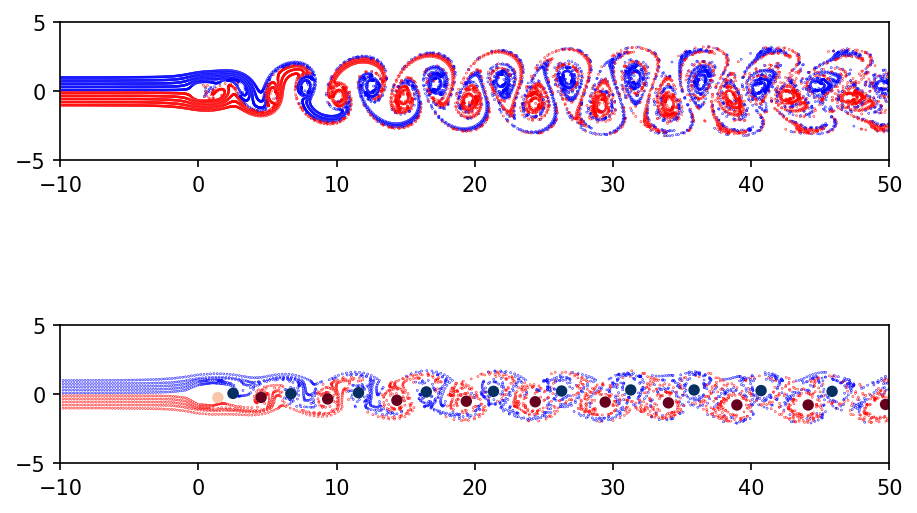

In [129]:
Nr = 3
fig, ax = plt.subplots(nrows=Nr, ncols=1, constrained_layout=True,dpi=150)
x = ptset[:,0]
y = ptset[:,1]
c = ptsetval[:]
ax[0].scatter(x, y, c=c, s=0.05,cmap='bwr')

x = tracers[:,i_x]
y = tracers[:,i_y]
c = tracers[:,i_inj]

ax[1].scatter(x, y, c=c, s=0.05,cmap='bwr',vmin=0,vmax=1)

x = tracers[:,i_x]
y = tracers[:,i_y]
c = tracers[:,i_inj]

ax[2].scatter(x, y, c=c, s=0.05,cmap='bwr',vmin=0,vmax=1)
# fig.colorbar(scat,orientation='horizontal')
x = eddies[:,i_x]
y = eddies[:,i_y]
c = eddies[:,i_G]
ax[2].scatter(x,y, c=c, s=20, marker = "o",cmap='RdBu_r',vmin=-0.9*Gamma_max,vmax=0.9*Gamma_max)


for ir in range(Nr):
    ax[ir].set_aspect('equal')
    ax[ir].set_xlim(xmin,xmax)
    ax[ir].set_ylim(-5,5)

plt.show()

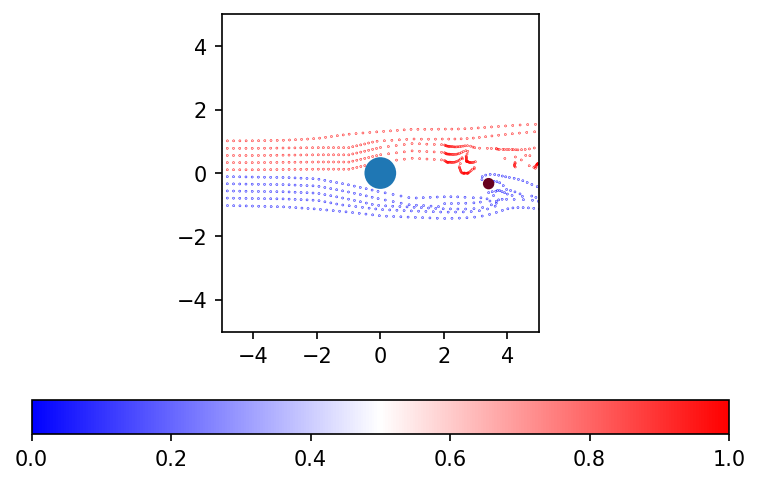

In [30]:

fig, ax = plt.subplots(dpi=150)
x = tracers[:,i_x]
y = tracers[:,i_y]
# c = np.sqrt(np.sum(tracers[:,i_u:i_v+1]**2,axis = 1))
# c = tracers[:,i_u] - f_Umean(tracers[:,i_y])
c = tracers[:,i_inj]

scat = plt.scatter(x, y, c=c, s=0.05,cmap='bwr',vmin=1,vmax=0)
fig.colorbar(scat,orientation='horizontal')
c1 = plt.Circle((0.,0.),0.5)
ax.add_artist(c1)
x = eddies[:,i_x]
y = eddies[:,i_y]
c = eddies[:,i_G]
plt.scatter(x,y, c=c, s=20, marker = "o",cmap='RdBu_r',vmin=-0.9*Gamma_max,vmax=0.9*Gamma_max)
plt.xlim(-5,5)
# plt.ylim(ymin,ymax)
plt.ylim(-5,5)
ax.set_aspect('equal')

plt.show()